In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../codes/')
from myUtils import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
######### Load datasets 
dftest_night = pd.read_pickle('../data_revision/results/dftest_night_new.pkl')
dftest_day   = pd.read_pickle('../data_revision/results/dftest_day_new.pkl')
df_res_day   = pd.read_pickle('../data_revision/results/df_res_day_new.pkl')
df_res_night = pd.read_pickle('../data_revision/results/df_res_night_new.pkl')

In [3]:
################ Plot model performance ##############################
cols = ['Phase', 'Period', 'Amount']
dfR2 = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['training', 'day', df_res_day['R2_train_slm'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'day', df_res_day['R2_val_slm'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['training', 'night', df_res_night['R2_train_slm'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'night', df_res_night['R2_val_slm'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(dftest_day)):
    data = ['test', 'day', dftest_day['R2'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['test', 'night', dftest_night['R2'][i]]
    dfR2 = dfR2.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)

In [4]:
cols1 = ['variable', 'value', 'period']
dfBetas = pd.DataFrame(columns=cols1)

for i in range(0, len(df_res_day)):
    tmp = df_res_day['SLM'][i][1]
    data = ['NDVI', tmp[0], 'day']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)
    tmp = df_res_day['SLM'][i][2]
    data = ['dw', tmp[0], 'day']
    
    tmp = df_res_night['SLM'][i][1]
    data = ['NDVI', tmp[0], 'night']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)
    tmp = df_res_night['SLM'][i][2]
    data = ['dw', tmp[0], 'night']

In [5]:
cols1 = ['variable', 'value', 'Period']
dfBetas = pd.DataFrame(columns=cols1)

for i in range(0, len(df_res_day)):
    tmp = df_res_day['SLM'][i]
    data = ['NDVI', tmp[1][0], 'day']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)
    data = ['dw',   tmp[2][0], 'day']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)
    
    tmp = df_res_night['SLM'][i]
    data = ['NDVI', tmp[1][0], 'night']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)
    data = ['dw',   tmp[2][0], 'night']
    dfBetas = dfBetas.append(pd.DataFrame(columns=cols1, data=[data]), ignore_index=True)

In [6]:
fs = 16
fs1 = 14

In [8]:
dfBetas.to_csv('../data_revision/dfBetas_figure3.csv', index=None)
dfR2.to_csv('../data_revision/dfR2_figure3.csv', index=None)

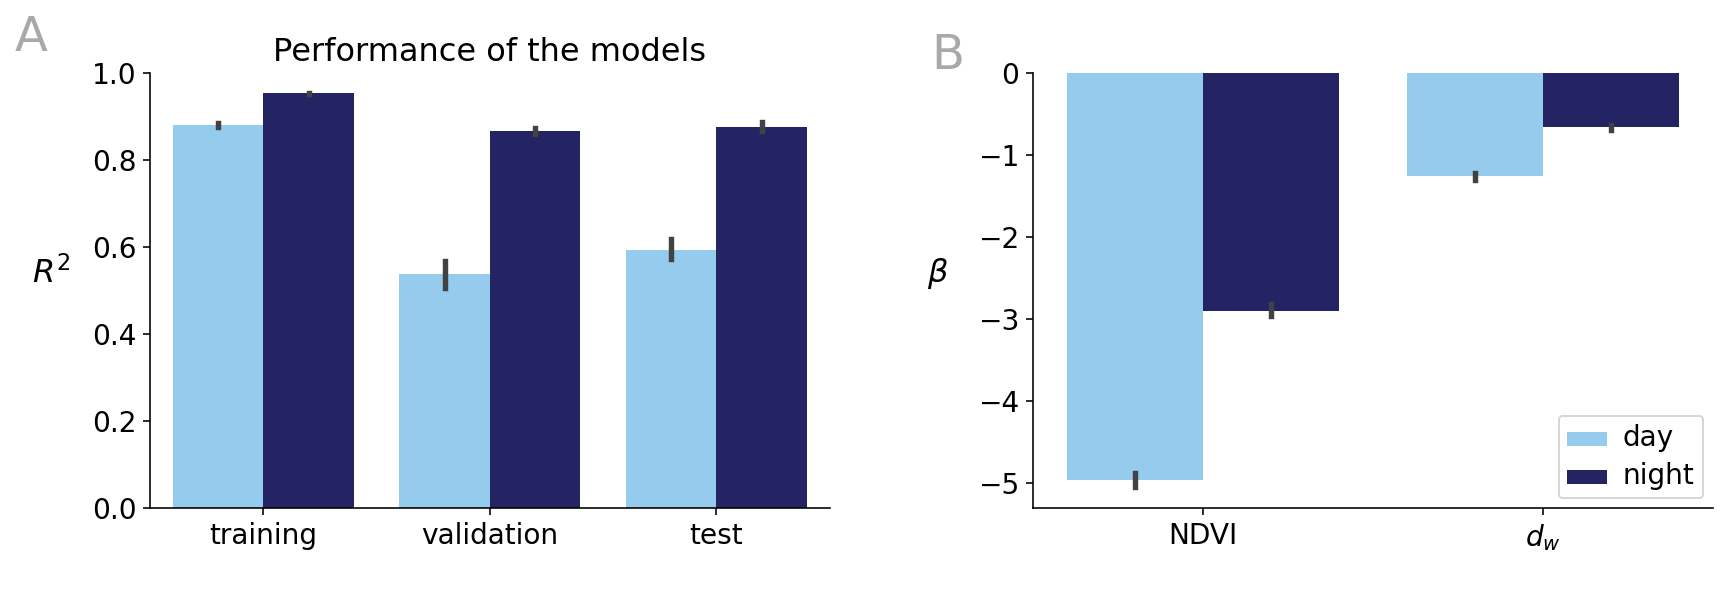

In [93]:
f,axs=plt.subplots(1,2, figsize=(14,4))
palette = ['lightskyblue', 'midnightblue']
ax=axs[0]
ax = setFont(ax,'Arial',fs1)
sns.barplot(x="Phase", y="Amount", hue="Period", data=dfR2, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$R^2$', size=fs, rotation=0, labelpad=20)
ax.set_title('Performance of the models', size=fs)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_ylim([0, 1]);
#ax.legend(fontsize=18, loc='lower left',frameon=False, title_fontsize=20, title=' ')
ax.legend([],[], frameon=False)
ax.text(-1.1, 1.05, 'A', fontsize=fs*1.5, color='darkgray')


ax = axs[1]
ax = setFont(ax,'Arial',fs1)
sns.barplot(x='variable', y='value', hue='Period', ax=ax, data=dfBetas, palette=palette)
ax.set_xlabel(' ')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_ylabel(r'$\beta$', size=fs, rotation=0, labelpad=20)
labels = ['NDVI', r'$d_w$']
ax.set_xticklabels(labels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.setp(ax.get_legend().get_texts(), fontsize=fs1); # for legend text;
ax.set_xlabel(' ')
ax.text(-.8,  0.05, 'B', fontsize=fs*1.5, color='darkgray')

f.subplots_adjust(wspace=0.3)





In [94]:
f.savefig('../figures_revision/Figure3.pdf', bbox_inches = 'tight')

In [ ]:
##################################### Define betas ########################################
cols = ['c','NDVI', 'NDBI', 'dw', 'y']
dfBetas_day = pd.DataFrame(columns=cols)
phases = df_res_day['Phase'].unique()
tmp = df_res_day.groupby(['Phase'])['R2_val_slm'].max().reset_index()
for phase in phases:
    tmp1 = df_res_day[df_res_day['R2_val_slm']==tmp['R2_val_slm'][phase]].reset_index(drop=True)
    betas = tmp1['SLM'][0]
    data = [betas[0][0], betas[1][0],betas[2][0],betas[3][0], betas[4][0]]
    dfBetas_day = dfBetas_day.append(pd.DataFrame(columns=cols,data=[data]), ignore_index=True)

In [ ]:
dfBetas_day.mean()

In [ ]:
dfBetas_night = pd.DataFrame(columns=cols)
tmp = df_res_night.groupby(['Phase'])['R2_val_slm'].max().reset_index()
for phase in phases:
    tmp1 = df_res_night[df_res_night['R2_val_slm']==tmp['R2_val_slm'][phase]].reset_index(drop=True)
    betas = tmp1['SLM'][0]
    data = [betas[0][0], betas[1][0],betas[2][0],betas[3][0], betas[4][0]]
    dfBetas_night = dfBetas_night.append(pd.DataFrame(columns=cols,data=[data]), ignore_index=True)

In [ ]:
dfBetas_night.mean()

In [ ]:
dfBetas_day.to_csv('../data_revision/coefficients/dfBetas_day.csv', index=None)
dfBetas_night.to_csv('../data_revision/coefficients/dfBetas_night.csv', index=None)

In [96]:
################ Plot model performance ##############################
cols = ['Phase', 'Period', 'Amount']
dfR2_ = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['training', 'day', df_res_day['R2_train_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'day', df_res_day['R2_val_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['training', 'night', df_res_night['R2_train_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'night', df_res_night['R2_val_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)

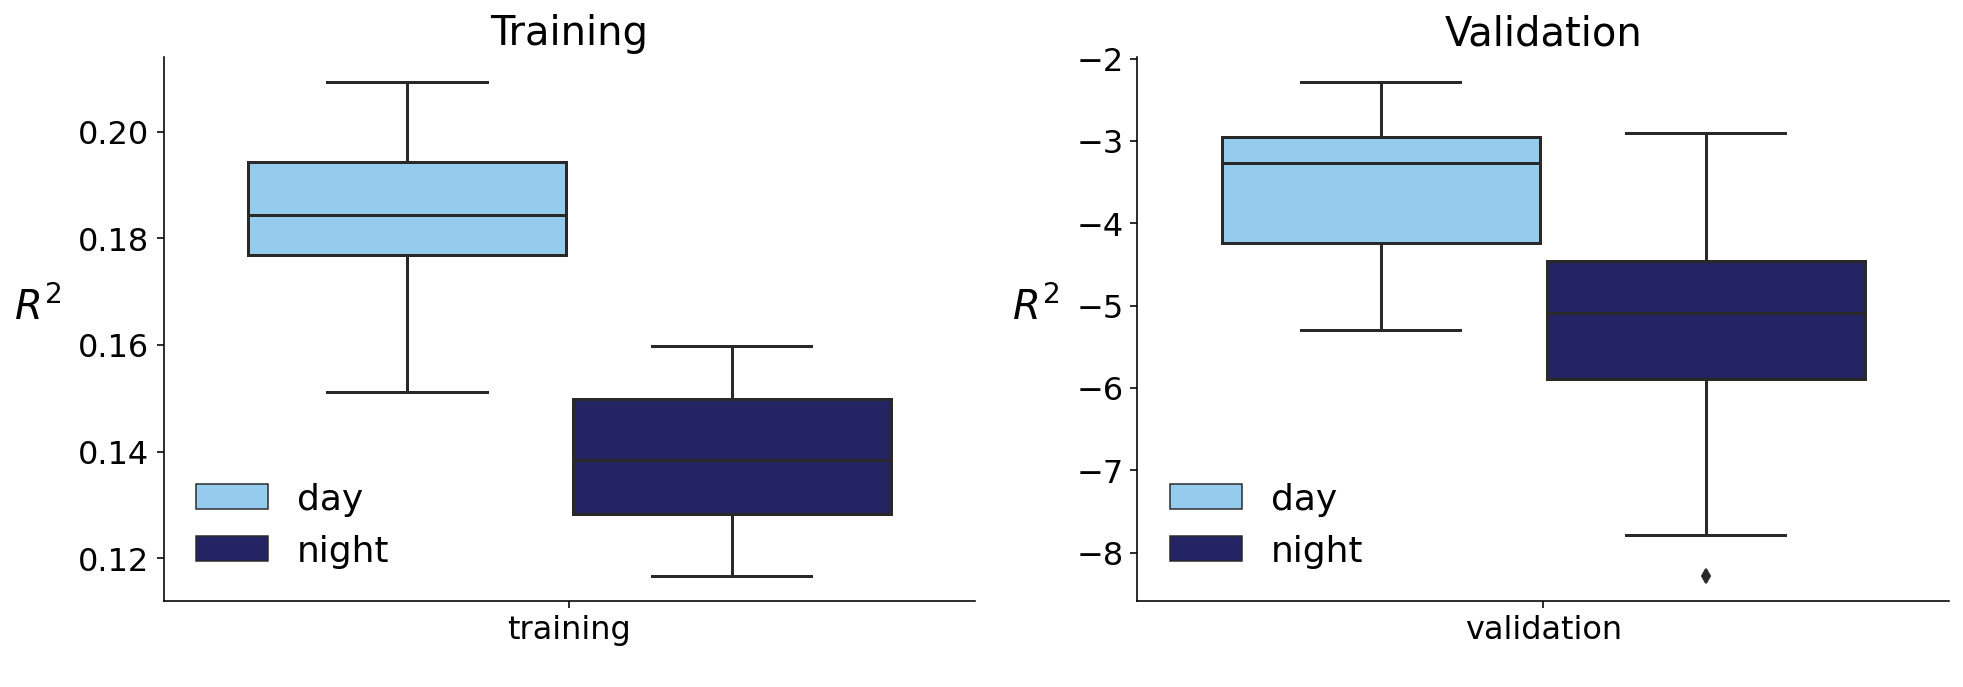

In [97]:
f,axs=plt.subplots(1,2, figsize=(16,5))
ax=axs[0]
ax = setFont(ax,'Arial',16)
dfR2_tr = dfR2_[dfR2_['Phase']=='training']
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfR2_tr, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$R^2$', size=20, rotation=0, labelpad=20)
ax.set_title('Training', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc='lower left',frameon=False, title_fontsize=20, title=' ')

ax=axs[1]
ax = setFont(ax,'Arial',16)
dfR2_tr = dfR2_[dfR2_['Phase']=='validation']
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfR2_tr, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$R^2$', size=20, rotation=0, labelpad=20)
ax.set_title('Validation', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc='lower left',frameon=False, title_fontsize=20, title=' ')


In [98]:
f.savefig('../figures_revision/ols.pdf', bbox_inches = 'tight')

In [99]:
################ Plot model performance ##############################
cols = ['Phase', 'Period', 'Amount']
dfMAE_slm = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['validation', 'day', df_res_day['MAE_val_slm'][i]]
    dfMAE_slm = dfMAE_slm.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['validation', 'night', df_res_night['MAE_val_slm'][i]]
    dfMAE_slm = dfMAE_slm.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
cols = ['Phase', 'Period', 'Amount']
dfMAE_ols = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['validation', 'day', df_res_day['MAE_val_ols'][i]]
    dfMAE_ols = dfMAE_ols.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['validation', 'night', df_res_night['MAE_val_slm'][i]]
    dfMAE_ols = dfMAE_ols.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    

Text(-0.6, 4.25, 'B')

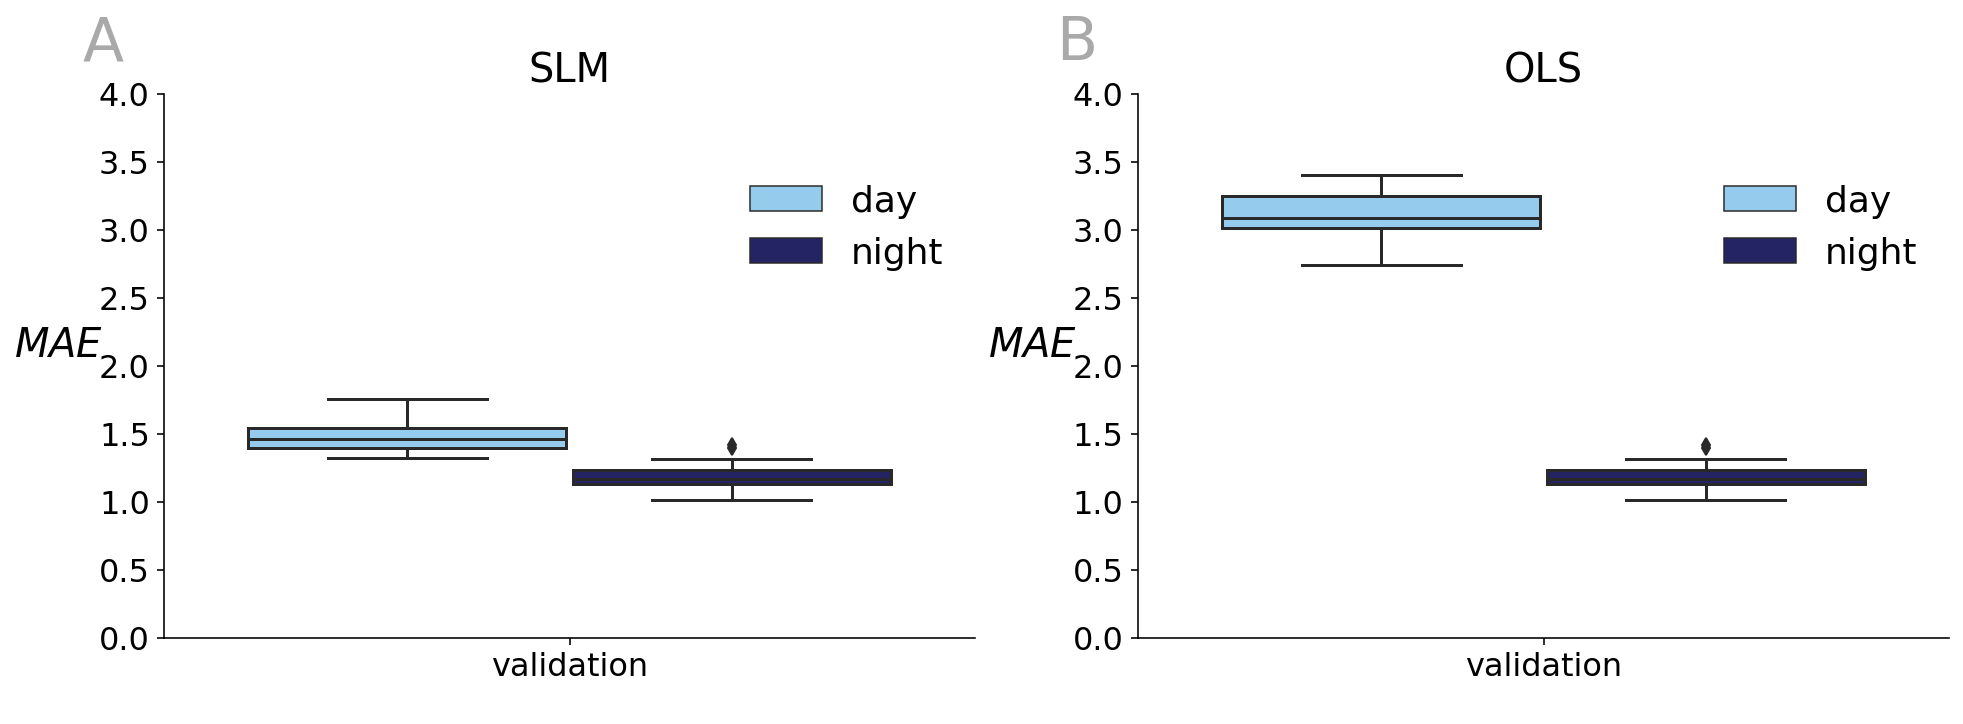

In [104]:
f,axs=plt.subplots(1,2, figsize=(16,5))
ax=axs[0]
ax = setFont(ax,'Arial',16)
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfMAE_slm, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$MAE$', size=20, rotation=0, labelpad=20)
ax.set_title('SLM', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc=1,frameon=False, title_fontsize=20, title=' ')
ax.set_ylim([0,4])
ax.text(-.6, 4.25, 'A', fontsize=30, color='darkgray')

ax=axs[1]
ax = setFont(ax,'Arial',16)
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfMAE_ols, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$MAE$', size=20, rotation=0, labelpad=20)
ax.set_title('OLS', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc=1,frameon=False, title_fontsize=20, title=' ')
ax.set_ylim([0,4])

ax.text(-.6,  4.25, 'B', fontsize=30, color='darkgray')



In [105]:
f.savefig('../figures_revision/mae.pdf', bbox_inches = 'tight')